# Assignment 2 - Individual Checkpoint 2

**Group ID**: CC08-03

**Driving Problem**: Do they avoid inactivity in at least 10 hours a day?

**Link to Github Page**: https://github.sydney.edu.au/jlin4572/2024-DATA3406-CC08-Group03/wiki/Gabriel-Timothy's-Page

**Person IDs analyzed in Checkpoint 1**: `6962181067`, `7007744171`, and `7086361926`

**Person ID explored in Checkpoint 2**: `6962181067`

**Why this person was chosen for Checkpoint 2**: I decided to analyze this person’s data in Checkpoint 2 because each person has activity patterns that raises interesting questions regarding their **consistency** in meeting the inactivity threshold of 10 hours. This will allow a deeper dive into their activity trends and provide a more **granular analysis**. I came up with **three visualization** ideas that could be a good starting point for us to do a deep dive into learning about this person's behaviours.

## 1. Daily Step Totals with Inactivity Threshold

### Initial Assumptions and Predictions
For person `6962181067`, I expect variability in daily step counts, with some days showing significantly higher activity than others. Based on research, a safe minimum step count to avoid inactivity is approximately **10,000 steps per day**, as supported by Paluch et al. (2022).

I predict that there will be days where this threshold is not met, indicating potential inactivity concerns.

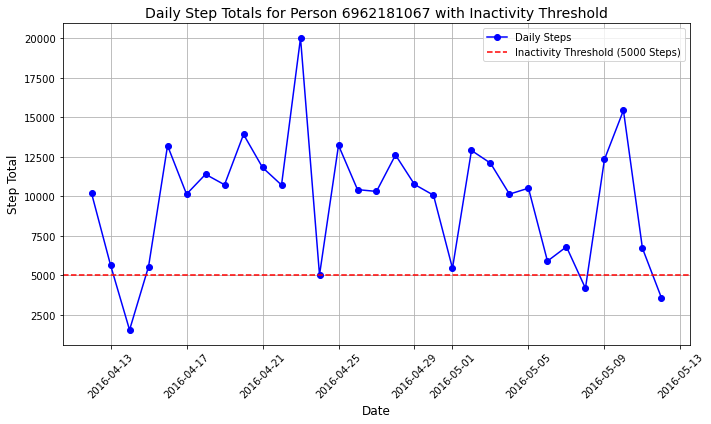

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

daily_steps = pd.read_csv('dailySteps_merged.csv') 

person_id = 6962181067
person_daily_steps = daily_steps[daily_steps['Id'] == person_id].copy()

person_daily_steps['ActivityDay'] = pd.to_datetime(person_daily_steps['ActivityDay'])

inactivity_threshold = 5000

plt.figure(figsize=(10,6))
plt.plot(person_daily_steps['ActivityDay'], person_daily_steps['StepTotal'], marker='o', color='blue', label='Daily Steps')
plt.axhline(y=inactivity_threshold, color='red', linestyle='--', label='Inactivity Threshold (5000 Steps)')

# Set title andlabels
plt.title(f'Daily Step Totals for Person {person_id} with Inactivity Threshold', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Step Total', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### Interpretation of Results
The graph shows the daily step totals for person `6962181067`, with a red line representing the inactivity threshold (10000 steps). On days where the step total is below this line, the person likely spent more than 10 hours inactive. These results allow us to observe if the individual consistently meets the activity goal or has periods of extended inactivity. 

## References

Paluch, A. E., Bajpai, S., Bassett, D. R., Carnethon, M. R., Ekelund, U., Evenson, K. R., Galuska, D. A., Jefferis, B. J., Kraus, W. E., Lee, I., Matthews, C. E., Omura, J. D., Patel, A. V., Pieper, C. F., Rees-Punia, E., Dallmeier, D., Klenk, J., Whincup, P. H., Dooley, E. E., . . . Fulton, J. E. (2022). Daily steps and all-cause mortality: a meta-analysis of 15 international cohorts. The Lancet Public Health, 7(3), e219–e228. https://doi.org/10.1016/s2468-2667(21)00302-9

## 2. Hourly Step Activity Heatmap

### Initial Assumptions and Predictions
For person `6962181067`, I expect there to be more step activity during typical waking hours (morning to early evening) and periods of inactivity during late-night hours. By visualizing hourly step data, I hope to identify if there are any extended periods of inactivity during the day that may contribute to the person failing to avoid inactivity for at least 10 hours a day.

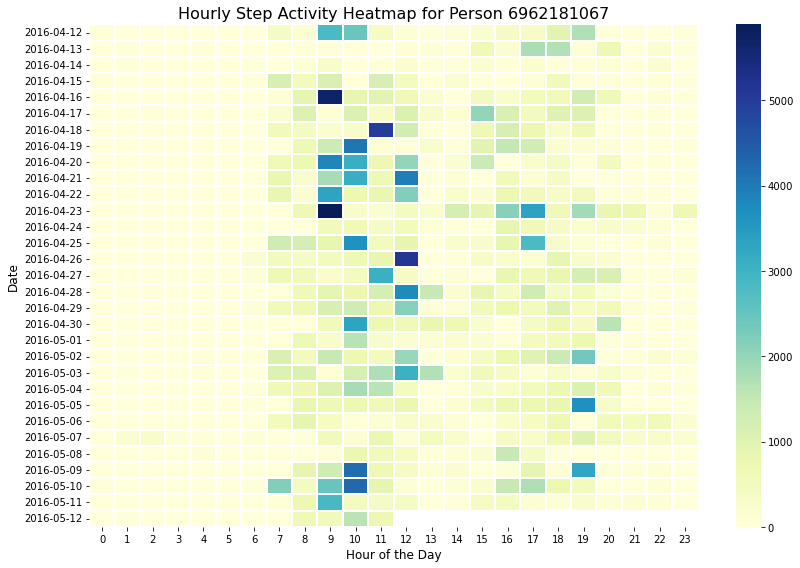

In [4]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the hourly steps dataset
hourly_steps = pd.read_csv('hourlySteps_merged.csv')

# Filter data for the specific person (ID: 6962181067)
person_id = 6962181067
person_hourly_steps = hourly_steps[hourly_steps['Id'] == person_id].copy()

# Convert 'ActivityHour' to datetime to separate date and hour
person_hourly_steps['ActivityHour'] = pd.to_datetime(person_hourly_steps['ActivityHour'])
person_hourly_steps['Date'] = person_hourly_steps['ActivityHour'].dt.date
person_hourly_steps['Hour'] = person_hourly_steps['ActivityHour'].dt.hour

# Pivot table to prepare for heatmap (rows: Date, columns: Hour, values: StepTotal)
heatmap_data = person_hourly_steps.pivot_table(index='Date', columns='Hour', values='StepTotal', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.3)

# Title and labels
plt.title(f'Hourly Step Activity Heatmap for Person {person_id}', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Date', fontsize=12)
plt.tight_layout()

plt.show()

### Interpretation of Results
The heatmap illustrates the hourly step activity for person `6962181067` over a period of several days. As expected, the person tends to be more active during daytime hours (from 7:00 AM to around 6:00 PM), with peaks in activity around mid-morning and late afternoon. There are periods of inactivity late at night, which is typical for sleeping hours. 

However, on certain days (e.g., April 23, May 3, and May 10), there are extended periods of inactivity during daytime hours, potentially contributing to the person failing to meet the goal of avoiding inactivity for at least 10 hours a day. These results suggest that while the person maintains a generally active routine, some days feature long inactive stretches, which may affect overall health outcomes.

## Inactivity vs Activity Pie Chart

### Initial Assumptions and Predictions
For person `6962181067`, I expect to see varying proportions of active versus inactive time depending on the day selected. We will focus on minute-level data, where "active" is defined as any minute with steps greater than 0. The aim is to assess whether the person avoids inactivity for at least 10 hours per day (i.e., 600 minutes of inactivity or fewer).

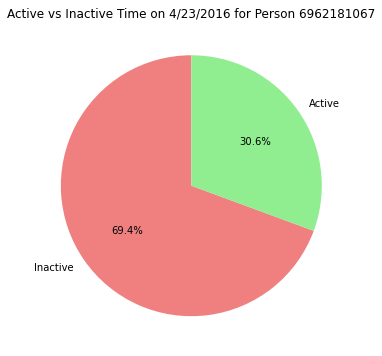

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

minute_steps = pd.read_csv('minuteStepsWide_merged.csv') 

person_id = 6962181067
person_minute_steps = minute_steps[minute_steps['Id'] == person_id].copy()

selected_date = '4/23/2016'

selected_day_data = person_minute_steps[person_minute_steps['ActivityHour'].str.contains(selected_date)]

active_minutes = (selected_day_data.iloc[:, 2:] > 0).sum().sum()

total_minutes_in_day = 24 * 60
inactive_minutes = total_minutes_in_day - active_minutes

plt.figure(figsize=(6,6))
plt.pie([inactive_minutes, active_minutes], labels=['Inactive', 'Active'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title(f'Active vs Inactive Time on {selected_date} for Person {person_id}')
plt.show()

### Interpretation of Results
The pie chart for April 23, 2016, shows the proportion of time spent active versus inactive for person `6962181067`. On this day, the person was inactive for 69.4% of the time and active for 30.6% of the time. Given that 10 hours of inactivity is equivalent to 600 minutes (or approximately 41.7% of the day), the person exceeded this threshold, spending a significant portion of the day inactive.

This result suggests that on April 23, the person did not meet the activity goal of avoiding inactivity for at least 10 hours. Further analysis of other days can help determine whether this pattern is consistent or an outlier in their activity levels.